### Business problem

We have data of 700 employees in a specific company. They have or haven`t been absent from work. The dataset contains reason for absence, date, transportation expense, distance to work, age, daily work load average, body mass index, education, number of children and pets and the absenteeism time of an employee, measured in hours. The goal is to predict whether a person could be excessively absent from work. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline 

In [2]:
df = pd.read_csv('Absenteeism-data.csv')

In [3]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Exploratory Data Analysis

In [4]:
df.shape

(700, 12)

In [5]:
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [6]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [7]:
df.corr()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
ID,1.000000,-0.079111,-0.203788,-0.493562,0.041367,0.092873,-0.320718,-0.032889,0.026095,0.005380,-0.005469
Reason for Absence,-0.079111,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.203788,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.493562,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.041367,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.092873,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,-0.320718,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.032889,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,0.026095,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,0.005380,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522


In [8]:
df = df.drop(['ID'], axis = 1)

In [9]:
df['Absenteeism Time in Hours'].min()

0

In [10]:
df['Absenteeism Time in Hours'].max()

120

In [11]:
df['Absenteeism Time in Hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

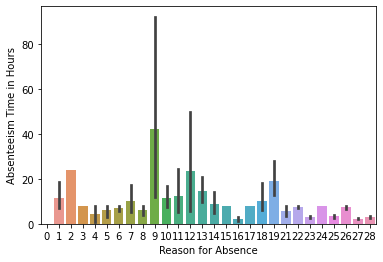

In [12]:
sns.barplot(x = df['Reason for Absence'], y = df['Absenteeism Time in Hours'])  

The Reasons for absence are as follows:
* 1 - Certain infectious and parasitic diseases
* 2 - Neoplasms
* 3 - Diseases of the blood and the blood-forming organs and certain disorders involving the immune mechanism
* 4 - Endocrine, nutritional and metabolic diseases
* 5 - Mental and behavioural disorders
* 6 - Diseases of the nervous system
* 7 - Diseases of the eye and adnexa
* 8 - Diseases of the ear and mastoid process
* 9 - Diseases of the circulatory system
* 10 - Diseases of the respiratory system
* 11 - Diseases of the digestive system
* 12 - Diseases of the skin and subcutaneous tissue
* 13 - Diseases of the musculoskeletal system and connective tissue
* 14 - Diseases of the genitourinary system
* 15 - Pregnancy, childbirth and the puerperium
* 16 - Certain conditions originating in the perinatal period
* 17 - Congenital malformations, deformations and chromosomal abnormalities
* 18 - Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
* 19 - Injury
* 20 - External causes of morbidity and mortality
* 21 - Factors influencing health status and contact with health services
* 22 - Patient follow-up
* 23 - Medical consultation
* 24 - Blood donation
* 25 - Laboratory examination
* 26 - Unjustified absence
* 27 - Physiotherapy
* 28 - Dental consultation

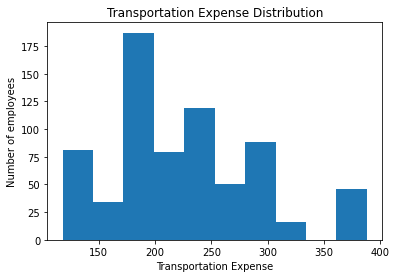

In [13]:
plt.hist(df['Transportation Expense'])
plt.xlabel('Transportation Expense')
plt.ylabel('Number of employees')
plt.title('Transportation Expense Distribution')
plt.show()

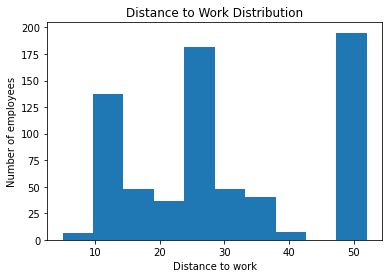

In [14]:
plt.hist(df['Distance to Work'])
plt.xlabel('Distance to work')
plt.ylabel('Number of employees')
plt.title('Distance to Work Distribution')
plt.show()

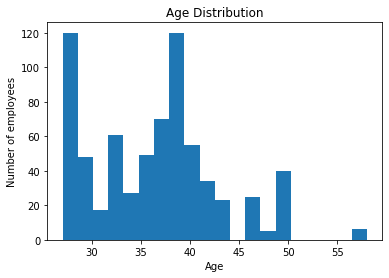

In [15]:
plt.hist(df['Age'], bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of employees')
plt.title('Age Distribution')
plt.show()

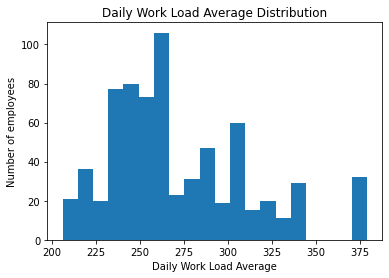

In [16]:
plt.hist(df['Daily Work Load Average'], bins = 20)
plt.xlabel('Daily Work Load Average')
plt.ylabel('Number of employees')
plt.title('Daily Work Load Average Distribution')
plt.show()

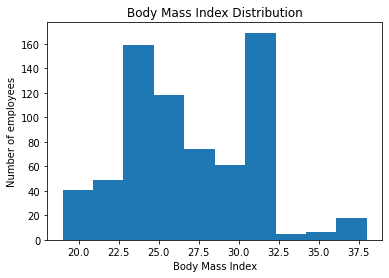

In [17]:
plt.hist(df['Body Mass Index'])
plt.xlabel('Body Mass Index')
plt.ylabel('Number of employees')
plt.title('Body Mass Index Distribution')
plt.show()

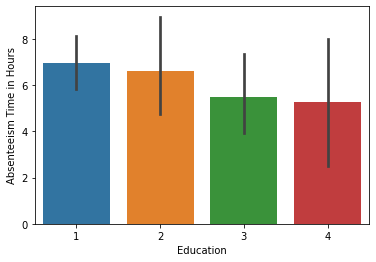

In [18]:
sns.barplot(x = df['Education'], y = df['Absenteeism Time in Hours'])  

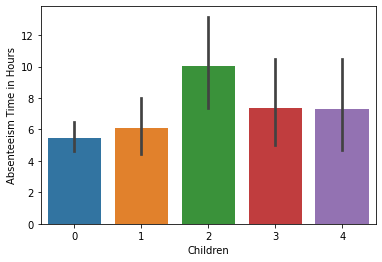

In [19]:
sns.barplot(x = df['Children'], y = df['Absenteeism Time in Hours'])  

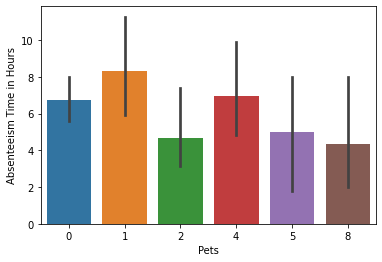

In [20]:
sns.barplot(x = df['Pets'], y = df['Absenteeism Time in Hours'])  

### Data Preprocessing

In [21]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### Group the reasons for absence

In [22]:
reason_disease = reason_columns.loc[:, 1:14].max(axis=1)
reason_birth_related = reason_columns.loc[:, 15:17].max(axis=1)
reason_poisoning = reason_columns.loc[:, 18:21].max(axis=1)
reason_light = reason_columns.loc[:, 22:].max(axis=1)

In [23]:
df = df.drop(['Reason for Absence'], axis = 1)

In [24]:
df = pd.concat([df, reason_disease, reason_birth_related, reason_poisoning, reason_light], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [25]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [26]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_disease', 'Reason_birth_related', 'Reason_poisoning', 'Reason_light']

In [27]:
df.columns = column_names
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [28]:
#creating a checkpoint
df_modified = df.copy()

#### 'Date' Column

In [29]:
type(df_modified['Date'][0])

str

In [30]:
df_modified['Date'] = pd.to_datetime(df_modified['Date'], format = '%d/%m/%Y')

In [31]:
type(df_modified['Date'])

pandas.core.series.Series

###### Extracting the Month Value

In [32]:
df_modified['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [33]:
df_modified['Date'][0].month

7

In [34]:
list_months = []

In [35]:
df_modified.shape

(700, 14)

In [36]:
for i in range(df_modified.shape[0]):
    list_months.append(df_modified['Date'][i].month)

In [37]:
len(list_months)

700

In [38]:
df_modified['Month'] = list_months
df_modified.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light,Month
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7


###### Extracting the day of the week

In [39]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [40]:
df_modified['Day of the Week'] = df_modified['Date'].apply(date_to_weekday)

In [41]:
df_modified.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light,Month,Day of the Week
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


In [42]:
df_modified = df_modified.drop(['Date'], axis = 1)
df_modified.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light,Month,Day of the Week
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


#### 'Education' Column

In [43]:
df_modified['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [44]:
df_modified['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

* 1 - High school
* 2 - Graduate
* 3 - Post-Graduate
* 4 - Master or PhD

In [45]:
df_modified['Education'] = df_modified['Education'].map({1:0, 2:1, 3:1, 4:1})

In [46]:
df_modified['Education'].unique()

array([0, 1], dtype=int64)

In [47]:
df_modified['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

#### Normalization

In [48]:
df_modified['Daily Work Load Average'] = df_modified['Daily Work Load Average'] / df_modified['Daily Work Load Average'].max()
df_modified['Transportation Expense'] = df_modified['Transportation Expense'] / df_modified['Transportation Expense'].max()
df_modified['Distance to Work'] = df_modified['Distance to Work'] / df_modified['Distance to Work'].max()
df_modified['Age'] = df_modified['Age'] / df_modified['Age'].max()
df_modified['Month'] = df_modified['Month'] / df_modified['Month'].max()
df_modified['Day of the Week'] = df_modified['Day of the Week'] / df_modified['Day of the Week'].max()
df_modified['Body Mass Index'] = df_modified['Body Mass Index'] / df_modified['Body Mass Index'].max()

#### Creating Targets

In [49]:
df_modified['Absenteeism Time in Hours'].median()

3.0

In [50]:
targets = np.where(df_modified['Absenteeism Time in Hours'] > 
                   df_modified['Absenteeism Time in Hours'].median(), 1, 0)

In [51]:
#checking if the targets are balanced
targets.sum() / targets.shape

array([0.45571429])

In [52]:
df_modified['Excessive Absenteeism'] = targets

In [53]:
df_modified.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light,Month,Day of the Week,Excessive Absenteeism
0,0.744845,0.692308,0.568966,0.632262,0.789474,0,2,1,4,0,0,0,1,0.583333,0.166667,1
1,0.304124,0.250000,0.862069,0.632262,0.815789,0,1,0,0,0,0,0,0,0.583333,0.166667,0
2,0.461340,0.980769,0.655172,0.632262,0.815789,0,0,0,2,0,0,0,1,0.583333,0.333333,0
3,0.719072,0.096154,0.672414,0.632262,0.631579,0,2,0,4,1,0,0,0,0.583333,0.500000,1
4,0.744845,0.692308,0.568966,0.632262,0.789474,0,2,1,2,0,0,0,1,0.583333,0.500000,0


In [54]:
df_preprocessed = df_modified.drop(['Absenteeism Time in Hours'], axis = 1)

In [55]:
df_preprocessed.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Reason_disease,Reason_birth_related,Reason_poisoning,Reason_light,Month,Day of the Week,Excessive Absenteeism
0,0.744845,0.692308,0.568966,0.632262,0.789474,0,2,1,0,0,0,1,0.583333,0.166667,1
1,0.304124,0.250000,0.862069,0.632262,0.815789,0,1,0,0,0,0,0,0.583333,0.166667,0
2,0.461340,0.980769,0.655172,0.632262,0.815789,0,0,0,0,0,0,1,0.583333,0.333333,0
3,0.719072,0.096154,0.672414,0.632262,0.631579,0,2,0,1,0,0,0,0.583333,0.500000,1
4,0.744845,0.692308,0.568966,0.632262,0.789474,0,2,1,0,0,0,1,0.583333,0.500000,0


### Logistic Regression Model

In [56]:
x = df_preprocessed.drop(['Excessive Absenteeism'], axis = 1)

In [57]:
y = df_preprocessed['Excessive Absenteeism']

In [58]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [59]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [60]:
print(confusion_matrix(y_test, y_pred))

[[56 16]
 [18 50]]


In [61]:
print("Accuracy score of the model is:",accuracy_score(y_test, y_pred) * 100,"%")

Accuracy score of the model is: 75.71428571428571 %


In [62]:
#precision = True positive / True positive + False Positive
precision = 56 / 72
precision

0.7777777777777778

In [63]:
#recall = True positive / True Positive + False Negative
recall = 56 / 74
recall

0.7567567567567568

In [64]:
#specificity = True Negative / True Negative + False Positive
specificity = 50 / 66
specificity

0.7575757575757576

##### Interpretation of the results

* The model scored an overall accuracy of approximately <b>76 %</b>.
* It was right in <b>78 %</b> of the times a positive class was predicted.
* Recognized <b>76 %</b> of all positive, and <b>76 %</b> of all negative examples. 